<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/2-Deep-Neural-Networks/2_2_Batch_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><a href='https://shangeth.com/google-ml-academy/'>Google ML Academy 2019</a></h1>
<h3>Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3>
<hr>


# Batch Training

Batch Training is something very important but we didn't use before as our dataset was smaller and we were just learning how to train models.

So far, 

- we took each example $(X^i, y^i)$ 
- made prediction with $\hat{y}^i = g(X^i.W+b)$
- calculated the loss $\mathcal{L}(y^i , \hat{y}^i)$
- used back propagation to update $W$ and $b$ (all parameters in the model) with
$w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$ and $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$
- and repeated this process.

What is the problem here?

We used many toy datasets which were in 1000s, so it will take few seconds/milliseconds for training the model for several epoch. But real world datasets may have millions of data and updating model with one example at a time may take a lot of time.


This is for multi class classification

$z = \begin{bmatrix}z_1&z_2&z_3\\ \end{bmatrix}  = \begin{bmatrix}x_1&x_2\\ \end{bmatrix} . \begin{bmatrix}W_{11}&W_{12}&W_{13}\\ W_{21}&W_{22}&W_{23}\\ \end{bmatrix} + \begin{bmatrix}b_1&b_2&b_3\\ \end{bmatrix}$

$\hat{y} = \sigma(z)$

This uses one example $X = [x_1, x_2]$ at a time, but it is also possible to use all the data together as a matrix(Advantage of matrix multiplication and lienar algebra).

$z = \begin{bmatrix}z_1^1&z_2^1&z_3^1\\ z_1^2&z_2^2&z_3^2\\ \vdots&\vdots&\vdots \\ z_1^n&z_2^n&z_3^n \\\end{bmatrix}  = 
\begin{bmatrix}x_1^1&x_2^1\\ x_1^2&x_2^2\\ \vdots&\vdots \\ x_1^n&x_2^n\\ \end{bmatrix} . 
\begin{bmatrix}W_{11}&W_{12}&W_{13}\\ W_{21}&W_{22}&W_{23}\\ \end{bmatrix} + \begin{bmatrix}b_1&b_2&b_3\\ \end{bmatrix}$

$ \hat{y} = \begin{bmatrix}\sigma(z_1^1)&\sigma(z_2^1)&\sigma(z_3^1)\\ \sigma(z_1^2)&\sigma(z_2^2)&\sigma(z_3^2)\\ \vdots&\vdots&\vdots \\ \sigma(z_1^n)&\sigma(z_2^n)&\sigma(z_3^n) \\\end{bmatrix} $

This is called **batch gradient descent**. There is a problem with this. When your data is in millions, holding all the millions of data into a matrix may cause memory issue. Its note possible for the RAM to hold millions of data into the memory altogether.


So we do something called **mini-batch gradient descent**. We take few number of examples say m(batch size) which the memory can hold at a time and use that for training and during the next step we use the next m examples and continue till the complete dataset is used for training.

Example: 

- no of examples (n) = 2300
- batch size (m) = 500
- then we use [500, 500, 500, 500, 300] batches for training at a time.

By this way we use the advantage of matrix multiplication and do not fill the RAM memory.

We can change the batch size with a parameter called batch_size in model.fit.

Lets try different batch size.

## Batch Training in TensorFlow

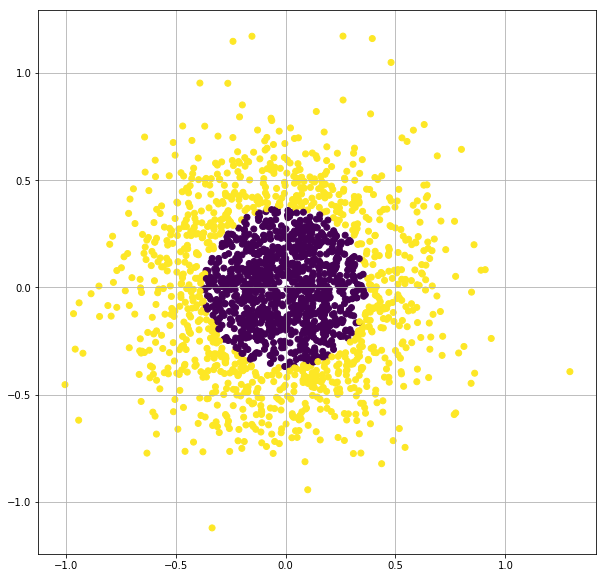

Train = 1120
Test = 600
Val = 280


In [2]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_gaussian_quantiles(n_samples=2000, n_features=2, n_classes=2, random_state=3, cov=0.1)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1],c=y)
plt.grid(True)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

print('Train = {}\nTest = {}\nVal = {}'.format(len(X_train), len(X_test), len(X_val)))

### Batch Size = 1

W0902 14:17:32.553351 139709616596864 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0902 14:17:32.656815 139709616596864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 2s 2ms/sample - loss: 0.6972 - acc: 0.4634 - val_loss: 0.6945 - val_acc: 0.5321
Epoch 2/10
1120/1120 [==============================] - 2s 1ms/sample - loss: 0.6942 - acc: 0.5312 - val_loss: 0.6923 - val_acc: 0.4250
Epoch 3/10
1120/1120 [==============================] - 2s 1ms/sample - loss: 0.6922 - acc: 0.4821 - val_loss: 0.6834 - val_acc: 0.6607
Epoch 4/10
1120/1120 [==============================] - 2s 1ms/sample - loss: 0.6821 - acc: 0.5893 - val_loss: 0.6731 - val_acc: 0.4821
Epoch 5/10
1120/1120 [==============================] - 2s 1ms/sample - loss: 0.6562 - acc: 0.6830 - val_loss: 0.6340 - val_acc: 0.7250
Epoch 6/10
1120/1120 [==============================] - 2s 1ms/sample - loss: 0.6269 - acc: 0.7036 - val_loss: 0.6025 - val_acc: 0.8036
Epoch 7/10
1120/1120 [==============================] - 2s 1ms/sample - loss: 0.6030 - acc: 0.7625 - val_loss: 0.5749 - val_acc: 0.7536
E

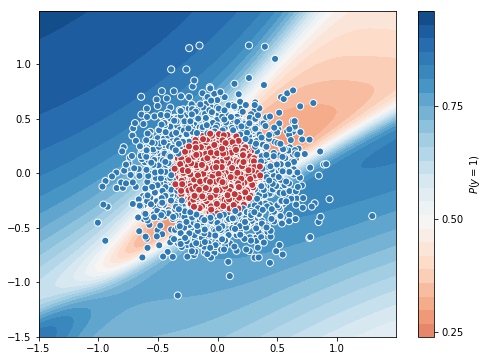


Test Accuracy =  0.7583333333333333
CPU times: user 21.5 s, sys: 1.52 s, total: 23 s
Wall time: 19.5 s


In [3]:
%%time 
#magic function to measure time of the cell


import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=10),
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


Batch size of 1 for 10 epochs uses 23s. Let's increase the batch size to 100 and check the time.

### Batch Size = 100

Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 0s 104us/sample - loss: 0.6993 - acc: 0.5116 - val_loss: 0.7020 - val_acc: 0.5107
Epoch 2/10
1120/1120 [==============================] - 0s 21us/sample - loss: 0.6960 - acc: 0.5134 - val_loss: 0.6988 - val_acc: 0.5179
Epoch 3/10
1120/1120 [==============================] - 0s 20us/sample - loss: 0.6946 - acc: 0.5223 - val_loss: 0.6963 - val_acc: 0.5143
Epoch 4/10
1120/1120 [==============================] - 0s 23us/sample - loss: 0.6934 - acc: 0.5312 - val_loss: 0.6943 - val_acc: 0.5214
Epoch 5/10
1120/1120 [==============================] - 0s 22us/sample - loss: 0.6929 - acc: 0.5277 - val_loss: 0.6936 - val_acc: 0.4964
Epoch 6/10
1120/1120 [==============================] - 0s 22us/sample - loss: 0.6927 - acc: 0.4688 - val_loss: 0.6940 - val_acc: 0.4286
Epoch 7/10
1120/1120 [==============================] - 0s 23us/sample - loss: 0.6923 - acc: 0.4420 - val_loss: 0.6931 - val_acc: 

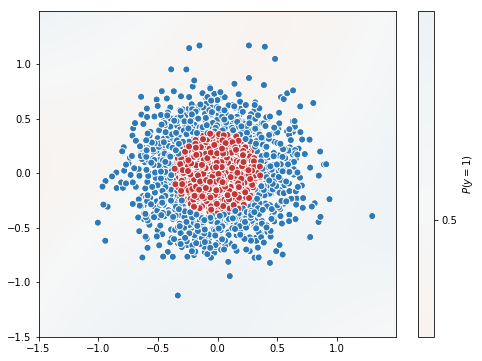


Test Accuracy =  0.47333333333333333
CPU times: user 2.56 s, sys: 387 ms, total: 2.94 s
Wall time: 2.34 s


In [4]:
%%time 
#magic function to measure time of the cell


import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

# random number initialized will to same, for reproducing same results.
np.random.seed(0)
tf.set_random_seed(0)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=10, input_shape=[2]), 
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=10),
                             keras.layers.Activation('tanh'),
                             keras.layers.Dense(units=1), 
                             keras.layers.Activation('sigmoid')
                             ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, batch_size=100, epochs=10, verbose=True, validation_data=(X_val, y_val))


# contour plot
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid)[:,0].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()

# test accuracy
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score((y_test_pred > 0.5), y_test)

print('\nTest Accuracy = ', test_accuracy)


Batch size of 100 took just 2.94s. Hope now you understood the advantage of Batch training.

# Gradient Descent in Batch Training

In batch training, we calculate the loss as average of loss of the batch,
$\mathcal{L}(y , \hat{y}) = \dfrac{1}{n} \sum_{i=1}^{n}\mathcal{L}(y^i , \hat{y}^i)$

$\therefore \dfrac{\partial \mathcal{L}}{\partial W} = \dfrac{1}{n} \sum_{i=1}^{n}\dfrac{\partial \mathcal{L}(y^i , \hat{y}^i)}{\partial W}$

$\dfrac{\partial \mathcal{L}}{\partial b} = \dfrac{1}{n} \sum_{i=1}^{n}\dfrac{\partial \mathcal{L}(y^i , \hat{y}^i)}{\partial b}$

Which means the gradients are average of gradients over the batch of data.

Then update the parameters normally with $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$ and $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$.